In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as TF
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from PIL import Image

In [2]:
filename = "../pictures/online/input/processed_Set_4_00024.tif"

In [3]:
im = cv2.imread(filename, -1)
im = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)

height, width = im.shape[:2]
im = im.T
rot = 45

In [7]:
M = cv2.getRotationMatrix2D((height / 2, width / 2), rot, 1)
im = cv2.warpAffine(im, M, (height, width))
im = cv2.flip(im, 1)

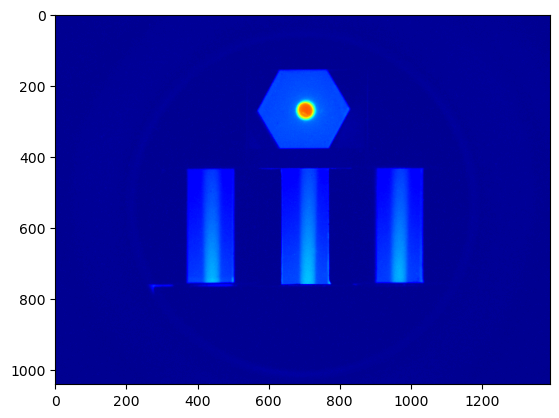

In [4]:
plt.imshow(
    im, cmap="jet", vmin=0, vmax=65000, interpolation=None
)  # oncoray
plt.show()

In [4]:
im = torch.from_numpy(im.astype("float32"))  # Move NumPy array to GPU

In [6]:
# im = im.unsqueeze(0)  # Shape: [1, H, W]
center = (width / 2, height / 2)

# print(im)
# rgb_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# Convert the numpy array to a PIL Image
# print(rgb_image)
# im = Image.fromarray(im)

im = TF.rotate(im, -rot)

# rotated_tensor = TF.affine(
#     im, angle=rot, translate=(0, 0), scale=1.0, shear=(0.0, 0.0), center=center
# )
# rotated_tensor = rotated_tensor.squeeze(0)

RuntimeError: grid_sampler(): expected grid to have size 1 in last dimension, but got grid with sizes [1, 1040, 1392, 2]

In [ ]:
plt.imshow(
    im, cmap="jet", vmin=0, vmax=65000, interpolation=None
)  # oncoray
plt.show()

In [71]:
rotated_tensor.size()

torch.Size([5, 5])

In [4]:
import cv2
import numpy as np
import torch
import torchvision.transforms.functional as TF
from scipy import ndimage

# Create a sample 5x5 matrix
# sample_matrix = np.array([
#     [1, 2, 3, 4, 5],
#     [6, 7, 8, 9, 10],
#     [11, 12, 13, 14, 15],
# ], dtype=np.float32)

sample_matrix = np.array(
    [
        [0, 0, 3, 0, 0],
        [0, 7, 8, 9, 0],
        [0, 12, 13, 14, 0],
        [0, 0, 8, 0, 0],
    ],
    dtype=np.float32,
)

print("Original Matrix:")
print(sample_matrix)

# Convert to a PyTorch tensor
sample_tensor = torch.tensor(sample_matrix)

# Define the rotation angle
rot_angle = 360

# Rotate using OpenCV
(h, w) = sample_matrix.shape
center = (h / 2, w / 2)
M = cv2.getRotationMatrix2D(center, rot_angle, 1.0)
rotated_cv2 = cv2.warpAffine(sample_matrix, M, (h, w), flags=cv2.INTER_LINEAR)
# rotated_cv2 = ndimage.rotate(sample_matrix, rot_angle)
# rotated_cv2 = cv2.flip(rotated_cv2, -1)

# rotated_cv2 = cv2.flip(rotated_cv2,1)

print("\nRotated Matrix using OpenCV:")
print(rotated_cv2)

# Convert the PyTorch tensor to 3D by adding a channel dimension
sample_tensor = sample_tensor.unsqueeze(0)  # Shape: [1, H, W]

# Rotate using PyTorch
rotated_tensor = TF.affine(
    sample_tensor,
    angle=rot_angle,
    translate=(0, 0),
    scale=1.0,
    shear=(0.0, 0.0),
    center=(w / 2, h / 2),
).squeeze(0)


print("\nRotated Matrix using PyTorch:")
print(rotated_tensor)

Original Matrix:
[[ 0.  0.  3.  0.  0.]
 [ 0.  7.  8.  9.  0.]
 [ 0. 12. 13. 14.  0.]
 [ 0.  0.  8.  0.  0.]]

Rotated Matrix using OpenCV:
[[ 0.  0.  3.  0.]
 [ 0.  7.  8.  9.]
 [ 0. 12. 13. 14.]
 [ 0.  0.  8.  0.]
 [ 0.  0.  0.  0.]]

Rotated Matrix using PyTorch:
tensor([[ 0.,  0.,  3.,  0.,  0.],
        [ 0.,  7.,  8.,  9.,  0.],
        [ 0., 12., 13., 14.,  0.],
        [ 0.,  0.,  8.,  0.,  0.]])


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk, opening

# Create a sample 7x7 image
# im = np.ones((7, 7), dtype=np.float32)

# Define a disk-shaped structuring element
radius = 1
selem = disk(radius)

# Apply the opening operation
im_opening = opening(im, selem)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(im, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image after Opening Operation with Disk Structuring Element")
plt.imshow(im_opening, cmap="gray")

plt.show()

NameError: name 'im' is not defined